<a href="https://colab.research.google.com/github/VedSher/ML_Assignment-3/blob/main/2205954_Vaidik_ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

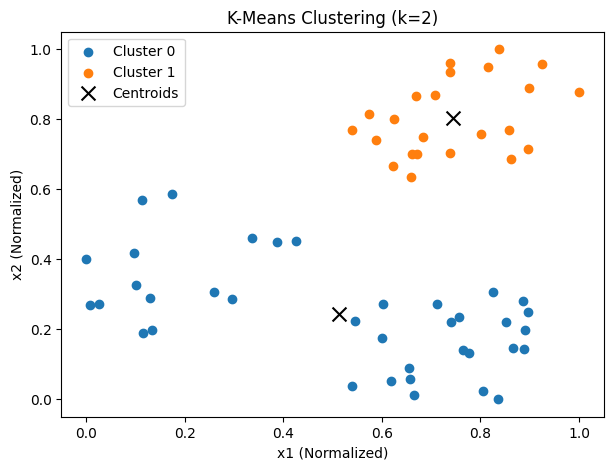

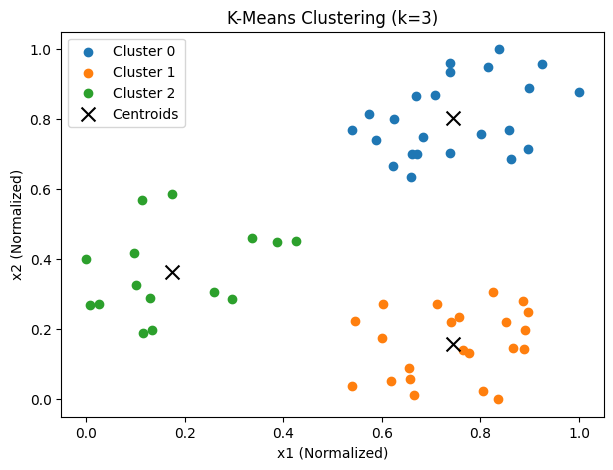

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/kmeans_blobs.csv"
df = pd.read_csv(file_path)

def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

df_normalized = df.copy()
df_normalized[['x1', 'x2']] = normalize_data(df[['x1', 'x2']])

def initialize_centroids(data, k):
    return data.sample(n=k).to_numpy()

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data.to_numpy()[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means_clustering(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data.to_numpy(), clusters, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return clusters, centroids

clusters_2, centroids_2 = k_means_clustering(df_normalized, k=2)

clusters_3, centroids_3 = k_means_clustering(df_normalized, k=3)

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(7, 5))
    for i in range(k):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.xlabel('x1 (Normalized)')
    plt.ylabel('x2 (Normalized)')
    plt.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()

data_np = df_normalized.to_numpy()

plot_clusters(data_np, clusters_2, centroids_2, k=2)
plot_clusters(data_np, clusters_3, centroids_3, k=3)